In [9]:
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
sns.set(style="whitegrid")

from leg_math.pytorch_wnom import wnom_basic, wnom_full

from constants import DATA_PATH
EU_PATH = DATA_PATH + '/eu/'

In [10]:
metrics_df = pd.read_pickle(EU_PATH + f'checkpoints/all_metrics_shuffle_wnom_full.pkl')

In [11]:
metrics_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
congress_cutoff,0,0,0,0,0,0,0,0,0,0,0,0
k_dim,1,1,2,2,3,3,4,4,5,5,6,6
k_time,0,1,0,1,0,1,0,1,0,1,0,1
covariates_list,[],[],[],[],[],[],[],[],[],[],[],[]
unanimity_check,False,False,False,False,False,False,False,False,False,False,False,False
train_accuracy,0.875107,0.870573,0.922825,0.923632,0.938706,0.938817,0.9469,0.948274,0.952141,0.953085,0.956536,0.957525
train_bce,0.26338,0.274723,0.184095,0.182777,0.153729,0.154751,0.135273,0.134924,0.124318,0.125164,0.114657,0.11367
train_log_like,3.06114e+06,3.19299e+06,2.13965e+06,2.12434e+06,1.78673e+06,1.7986e+06,1.57222e+06,1.56816e+06,1.4449e+06,1.45473e+06,1.33261e+06,1.32113e+06
test_accuracy,0.873843,0.869096,0.921099,0.921643,0.936145,0.936106,0.943712,0.944879,0.948107,0.949066,0.952033,0.952916
test_bce,0.268419,0.279342,0.193012,0.192086,0.166651,0.167212,0.152288,0.151486,0.142992,0.142386,0.135985,0.134778


In [12]:
train_data = metrics_df[["k_dim", "k_time", "train_bce", "train_accuracy", "train_bic", "train_aic"]].copy()
test_data = metrics_df[["k_dim", "k_time", "test_bce", "test_accuracy", "test_bic", "test_aic"]].copy()
columns = ["k_dim", "k_time", "log_loss", "accuracy", "bic", "aic"]
train_data.columns = columns
test_data.columns = columns
train_data["mode"] = "train"
test_data["mode"] = "test"
plot_data = pd.concat([train_data, test_data])

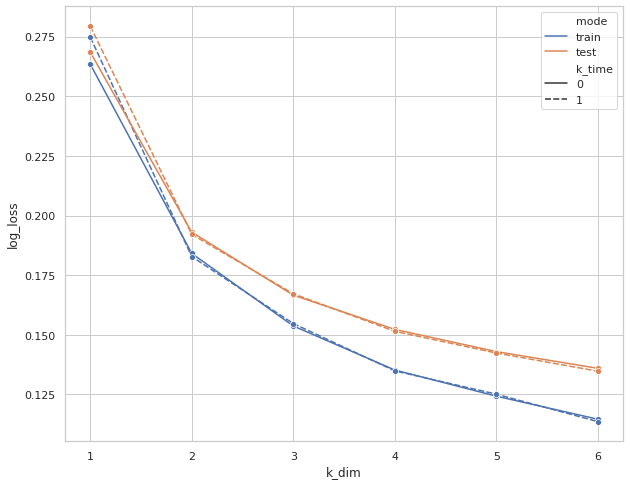

In [13]:
ax = sns.lineplot(data=plot_data, x="k_dim", y="log_loss", estimator=None, hue="mode", style="k_time", marker="o")

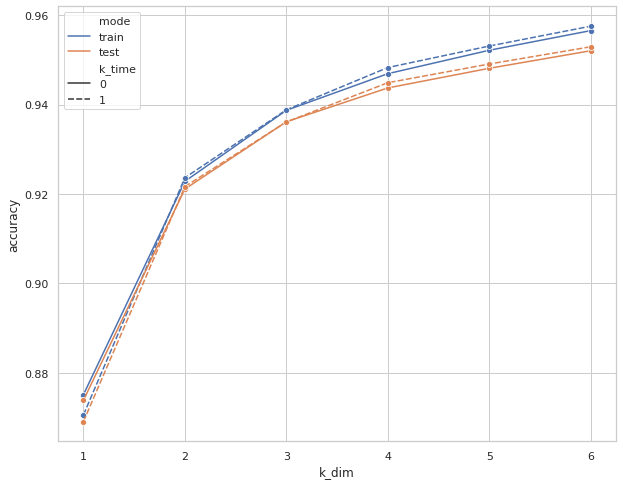

In [14]:
ax = sns.lineplot(data=plot_data, x="k_dim", y="accuracy", estimator=None, hue="mode", style="k_time", marker="o")

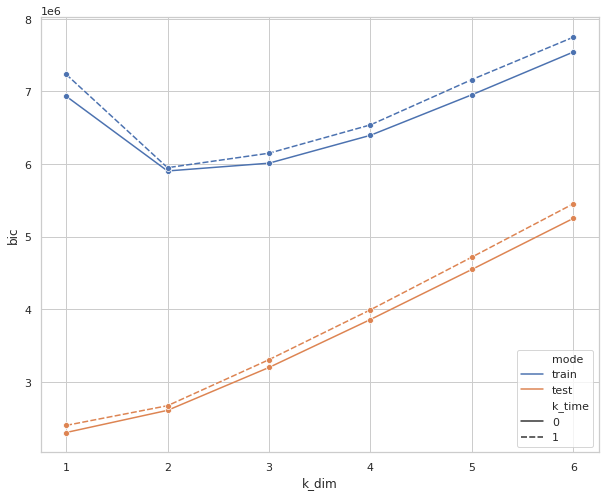

In [15]:
ax = sns.lineplot(data=plot_data, x="k_dim", y="bic", estimator=None, hue="mode", style="k_time", marker="o")

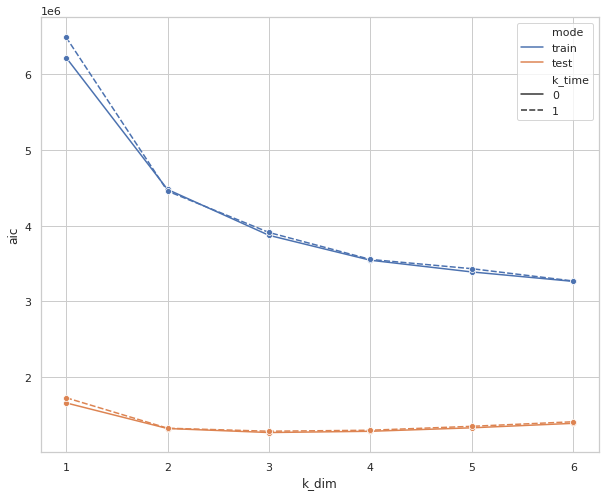

In [16]:
ax = sns.lineplot(data=plot_data, x="k_dim", y="aic", estimator=None, hue="mode", style="k_time", marker="o")

In [7]:
import os
import pyro
import torch

from ignite.engine import Engine, Events
from ignite.metrics import Accuracy, Loss, RunningAverage
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.contrib.handlers import ProgressBar

import pandas as pd
import numpy as np

from data_generation.data_processing import process_data, format_model_data

from constants import DATA_PATH

from sklearn.metrics import accuracy_score

from leg_math.pytorch_wnom import wnom_basic, wnom_full

from tqdm import tqdm

from qhoptim.pyt import QHM, QHAdam

import logging
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(filename)s - %(funcName)s - %(message)s', level=logging.WARNING)
logger = logging.getLogger(__name__)

pyro.enable_validation(True)

# Set up environment
gpu = False

if gpu:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

EU_PATH = DATA_PATH + '/eu/'
if not os.path.exists(EU_PATH):
    os.makedirs(EU_PATH)

logger.info("Load and process the EU data")
most_recent_parties = pd.read_feather(EU_PATH + "most_recent_parties.feather")

eu_votes = pd.read_feather(EU_PATH + "eu_votes.feather")
eu_votes["voteid"] = eu_votes["voteid"].astype(str)

vote_metadata = pd.read_feather(EU_PATH + "eu_vote_metadata.feather")
vote_metadata["voteid"] = vote_metadata["voteid"].astype(str)
# vote_metadata['time_passed'] = vote_metadata['ts'].dt.year - 2004
vote_metadata["congress"] = vote_metadata['ts'].dt.year
vote_metadata["time_vote"] = vote_metadata['ts'].dt.year
vote_time_passed = vote_metadata[["voteid", "congress", "time_vote"]]
eu_votes = pd.merge(eu_votes, vote_time_passed, on='voteid')

vote_df = eu_votes.rename(columns={"voteid": "vote_id"})
vote_df = vote_df.drop(columns=["name", "obscure_id"])
vote_df = vote_df.dropna(subset=["mepid"]).copy()
vote_df["leg_id"] = vote_df["mepid"].astype(int).astype(str)
vote_df["vote"] = vote_df["vote_type"].map({"+": 1, "-": 0, "0": np.nan})
vote_df = vote_df.dropna().copy()
vote_df["vote"] = vote_df["vote"].astype(int)

vote_df = pd.merge(vote_df,
                   most_recent_parties[["person_id", "init_value"]],
                   left_on='leg_id',
                   right_on="person_id",
                   how='left')

In [9]:
k_dim = 1
k_time = 0

logger.info(f"Processing for k_dim={k_dim} and k_time={k_time}")
data_params = dict(
               congress_cutoff=2000,
               k_dim=k_dim,
               k_time=k_time,
               covariates_list=[],
               unanimity_check=False,
               )
vote_data = process_data(vote_df=vote_df, **data_params)
custom_init_values = torch.tensor(vote_data["init_embedding"].values, dtype=torch.float, device=device)

x_train, x_test, sample_weights = format_model_data(vote_data, data_params, weight_by_frequency=False)

# Convert training and test data to tensors
legs = torch.tensor(x_train[0].flatten(), dtype=torch.long, device=device)
votes = torch.tensor(x_train[1].flatten(), dtype=torch.long, device=device)
responses = torch.tensor(vote_data["y_train"].flatten(), dtype=torch.float, device=device)
if k_time > 0:
    time_tensor = torch.tensor(np.stack(vote_data["time_passed_train"]).transpose(), dtype=torch.float, device=device)
    time_present = torch.tensor(vote_data["time_present"], device=device)

legs_test = torch.tensor(x_test[0].flatten(), dtype=torch.long, device=device)
votes_test = torch.tensor(x_test[1].flatten(), dtype=torch.long, device=device)
responses_test = torch.tensor(vote_data["y_test"].flatten(), dtype=torch.float, device=device)
if k_time > 0:
    time_tensor_test = torch.tensor(np.stack(vote_data["time_passed_test"]).transpose(), dtype=torch.float, device=device)

# Set some constants
n_legs = torch.unique(legs).shape[0]
n_votes = torch.unique(votes).shape[0]

# Adjust init values for time setup
if k_time > 0:
    first_dim = custom_init_values
    other_dims = 0.000001 * (torch.rand(n_legs, k_dim, k_time, device=device) - 0.5)
    pretrained = torch.cat([first_dim.unsqueeze(-1), other_dims], dim=2)
else:
    pretrained = custom_init_values

In [10]:
logger.info("Set up a pytorch model with ignite")
if k_time > 0:
    model = wnom_full(n_legs, n_votes, k_dim, pretrained, k_time=k_time).to(device)
else:
    model = wnom_full(n_legs, n_votes, k_dim, pretrained).to(device)

In [16]:
model.load_state_dict(torch.load(EU_PATH + "checkpoints/" + f'shuffle_{k_dim}_{k_time}_wnom_full_400.pt'))

<All keys matched successfully>

In [55]:
def epoch_sort(f_name):
    return int(re.search('(?<=\_)(\d*)(?=\.)', f_name).group(0))


In [118]:
import re
file_list = [file for file in os.listdir(EU_PATH + "checkpoints/") if file.startswith(f'shuffle_{k_dim}_{k_time}')]
file_list.sort(key=epoch_sort)
usable_files = file_list[-20:]

In [125]:
ideal_points = []
for ff in usable_files:
    if k_time > 0:
        temp_model = wnom_full(n_legs, n_votes, k_dim, pretrained, k_time=k_time).to(device)
    else:
        temp_model = wnom_full(n_legs, n_votes, k_dim, pretrained).to(device)
    temp_model.load_state_dict(torch.load(EU_PATH + "checkpoints/" + ff))
    ideal_points += [temp_model.ideal_points.detach().numpy().copy()]

In [127]:
pd.DataFrame(np.stack(ideal_points, axis=1).squeeze()).std(axis=1)

0       0.005536
1       0.004837
2       0.007822
3       0.006554
4       0.007751
          ...   
2324    0.014583
2325    0.020355
2326    0.025338
2327    0.015148
2328    0.060300
Length: 2329, dtype: float32

In [99]:
ideal_points[0] == ideal_points[1]

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

In [124]:
model.load_state_dict(torch.load(EU_PATH + "checkpoints/" + usable_files[-1]))
model.ideal_points

Parameter containing:
tensor([[-0.3023],
        [-0.2933],
        [-0.7417],
        ...,
        [-0.9368],
        [-0.4265],
        [-0.2780]], requires_grad=True)